In [1]:
fprintf('Running demo.m....\n');
eval(['mex matlab/LOGOS.cpp src/Point.cpp src/Match.cpp src/Logos.cpp src/PointPair.cpp']); 
addpath(genpath('matlab'))

Running demo.m....
Building with 'g++'.
MEX completed successfully.


In [2]:
numClusters = 512;

load(sprintf('matlab/centers_%s_%d.mat','SURF',numClusters),'centers');

if exist('vl_kdtreebuild')
    kdtree = vl_kdtreebuild(centers);
end

im1 = 1448;
im2 = 388;

IM1 = imread(sprintf('%04i.jpg',im1));
IM2 = imread(sprintf('%04i.jpg',im2));

In [3]:
%extract features
fprintf('Loading Image 1....\n');
[f1,vPA] = findFeatures(rgb2gray(IM1));

L1 = size(vPA,1);
vP1 = vPA.Location;
oP1 = vPA.Orientation;
sP1 = vPA.Scale; 

%extract features
fprintf('Loading Image 2....\n');
[f2,vPB] = findFeatures(rgb2gray(IM2));

% find words
fprintf('Find words....\n');
if (exist('kdtree','var') && exist('vl_kdtreequery'))
  nn1 = vl_kdtreequery(kdtree, centers, f1');       
  nn2 = vl_kdtreequery(kdtree, centers, f2');           
else
  D1 = distCosine(centers',f1);
  [~,nn1] = min(D1);   
    
  D2 = distCosine(centers',f2);
  [~,nn2] = min(D2);
end

Loading Image 1....
Loading Image 2....
Find words....


In [4]:
L2 = size(vPB,1);
vP2 = vPB.Location;
oP2 = vPB.Orientation;
sP2 = vPB.Scale; 

w1 = double(nn1);
w2 = double(nn2);

parameters = defaultparameters();

In [5]:
fprintf('Running C++ LOGOS Implementation....\n');
[x1,y1,z1] = LOGOS(double(vP1'),double(oP1),double(sP1),w1,double(vP2'),double(oP2),double(sP2),w2,parameters);

Running C++ LOGOS Implementation....
C++ implementation takes 0.0720406 secs 


In [6]:
fprintf('Running MATLAB LOGOS Implementation....\n');
tic;
[a1,u,d1,b1,c1,e1,f1,mp] = estimateMatches(vP1,oP1,sP1,vP2,oP2,sP2,w1,w2,parameters);
elapsedtime=toc;
fprintf('MATLAB implementation takes %06f secs\n',elapsedtime);

Running MATLAB LOGOS Implementation....
MATLAB implementation takes 0.244726 secs


Generating images...
> In images.internal.initSize (line 71)
  In imshow (line 328)
  In showMatchedFeatures (line 123)


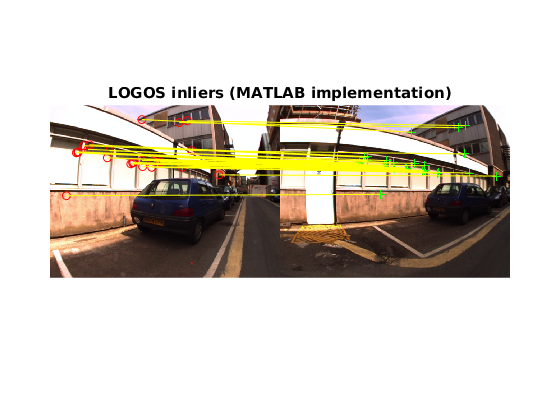

In [7]:
fprintf('Generating images...\n')

vPC = vP1(d1,:);
vP2C = vP2(b1,:);

figure(2); showMatchedFeatures(IM1,IM2,vPC,vP2C,'montage');
title('LOGOS inliers (MATLAB implementation)')

> In images.internal.initSize (line 71)
  In imshow (line 328)
  In showMatchedFeatures (line 123)


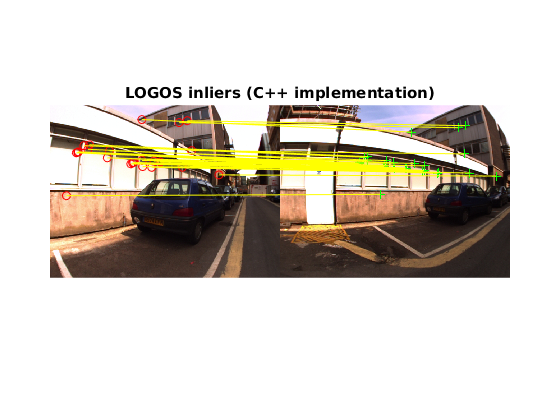

In [8]:
vPD = vP1(y1+1,:);
vP2D = vP2(z1+1,:);

figure(3); showMatchedFeatures(IM1,IM2,vPD,vP2D,'montage');
title('LOGOS inliers (C++ implementation)')